In [3]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [7]:
(x_Train, y_Train),(x_Test, y_Test) =mnist.load_data()

In [8]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [9]:
x_Train4D_normalize=x_Train4D/255
x_Test4D_normalize=x_Test4D/255

In [10]:
y_TrainOneHot=np_utils.to_categorical(y_Train)
y_TestOneHot=np_utils.to_categorical(y_Test)

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [14]:
model=Sequential()

In [15]:
model.add(Conv2D(filters=16,
                kernel_size=(5,5),
                padding='same',
                input_shape=(28,28,1),
                activation='relu'))

In [16]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
model.add(Conv2D(filters=36,
                kernel_size=(5,5),
                padding='same',
                activation='relu'))

In [18]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
model.add(Dropout(0.25))

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(128,activation='relu'))

In [22]:
model.add(Dense(10,activation='softmax'))

In [23]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [24]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',metrics=['accuracy'])

In [25]:
train_history=model.fit(x=x_Train4D_normalize,
                       y=y_TrainOneHot,validation_split=0.2,
                       epochs=10,batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 26s - loss: 0.3600 - accuracy: 0.8966 - val_loss: 0.0944 - val_accuracy: 0.9733
Epoch 2/10
 - 24s - loss: 0.0918 - accuracy: 0.9713 - val_loss: 0.0652 - val_accuracy: 0.9809
Epoch 3/10
 - 25s - loss: 0.0650 - accuracy: 0.9793 - val_loss: 0.0490 - val_accuracy: 0.9847
Epoch 4/10
 - 26s - loss: 0.0526 - accuracy: 0.9830 - val_loss: 0.0445 - val_accuracy: 0.9868
Epoch 5/10
 - 26s - loss: 0.0425 - accuracy: 0.9869 - val_loss: 0.0435 - val_accuracy: 0.9880
Epoch 6/10
 - 26s - loss: 0.0379 - accuracy: 0.9880 - val_loss: 0.0416 - val_accuracy: 0.9883
Epoch 7/10
 - 25s - loss: 0.0313 - accuracy: 0.9903 - val_loss: 0.0386 - val_accuracy: 0.9888
Epoch 8/10
 - 24s - loss: 0.0290 - accuracy: 0.9905 - val_loss: 0.0375 - val_accuracy: 0.9894
Epoch 9/10
 - 24s - loss: 0.0243 - accuracy: 0.9924 - val_loss: 0.0332 - val_accuracy: 0.9900
Epoch 10/10
 - 24s - loss: 0.0222 - accuracy: 0.9927 - val_loss: 0.0355 - val_accuracy: 0.9887


In [41]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
        plt.plot(train_history.history[train])
        plt.plot(train_history.history[validation])
        plt.title('Train History')
        plt.ylabel(train)
        plt.xlabel('Epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()

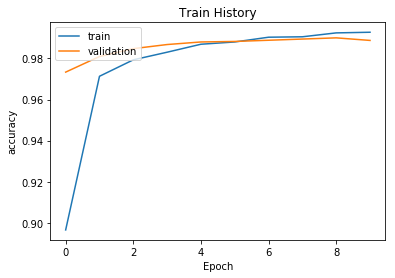

In [42]:
show_train_history(train_history,'accuracy','val_accuracy')

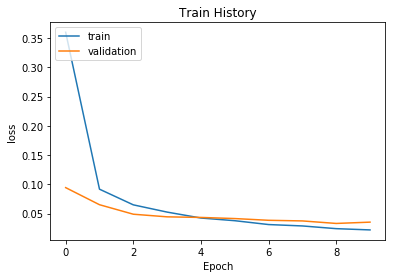

In [49]:
show_train_history(train_history,'loss','val_loss')

In [50]:
scores=model.evaluate(x_Test4D_normalize, y_TestOneHot)
scores[1]

10000/10000 [==============================] - 2s 157us/step


0.9904999732971191

In [53]:
prediction=model.predict_classes(x_Test4D_normalize)

In [54]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [56]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

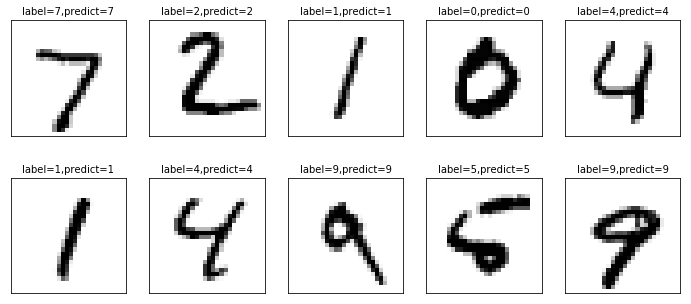

In [57]:
plot_images_labels_prediction(x_Test, y_Test, prediction, idx=0)

In [58]:
import pandas as pd
pd.crosstab(y_Test, prediction,
           rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,1,1,1,0
1,0,1134,1,0,0,0,0,0,0,0
2,2,3,1023,0,1,0,0,2,1,0
3,0,0,0,1003,0,5,0,0,1,1
4,0,0,0,0,974,0,0,0,1,7
5,2,0,0,3,0,885,1,0,0,1
6,3,3,0,0,3,3,945,0,1,0
7,0,2,2,3,0,0,0,1018,1,2
8,7,1,2,2,0,4,0,3,949,6


In [60]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)=mnist.load_data()

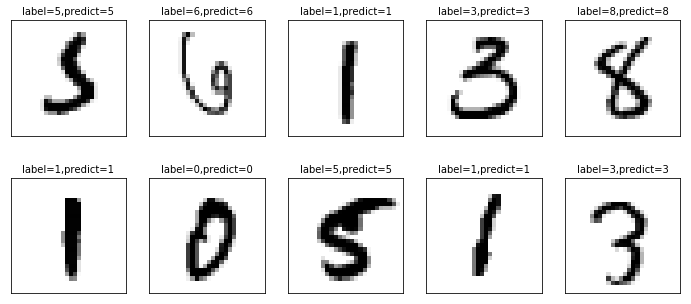

In [61]:
plot_images_labels_prediction(x_test_image,y_test_label,
                             prediction,idx=340)